In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing - Handling Missing Values

In [9]:
df = df.drop(columns='Cabin', axis=1)

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Visulization

<AxesSubplot:xlabel='Sex', ylabel='count'>

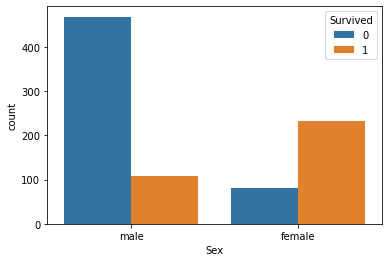

In [17]:
sns.countplot(x='Sex', hue='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

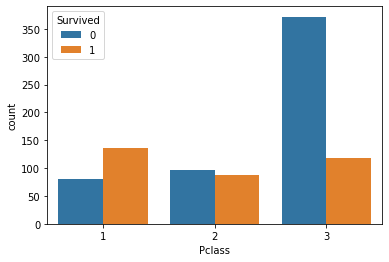

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=df)

# Data Preprocessing - converting categorical Columns

In [22]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

# Test Train Split

In [24]:
# Splittting columns for test and train
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = df['Survived']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Training the model

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
model.fit(x_train, y_train)

LogisticRegression()

# Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
x_test_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, x_test_pred)*100)

Accuracy: 80.44692737430168


In [43]:
cm = pd.DataFrame(confusion_matrix(y_test, x_test_pred), columns=['Actual -ve', 'Actual +ve'], index=['Predicted -ve', 'Predicted +ve'])
cm

,Actual -ve,Actual +ve
Predicted -ve,99,9
Predicted +ve,26,45


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, x_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       108
           1       0.83      0.63      0.72        71

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.81      0.80      0.80       179

